<a href="https://colab.research.google.com/github/PradipaJavierFatah/PradipaJavierFatah-Analisis_Sentimen_Aplikasi_Perbankan/blob/main/Analisis_Sentimen_Aplikasi_Perbankan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Content:

1. Import library & data
2. Preprocessing
3. Labeling
4. Visualization
5. Prepare data training
3. Traning data
7. Comperative evaluation


# 1. Import Library & Data

In [ ]:
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from collections import Counter


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BINUS/SEMESTER 5/Data Science/Project Analisis Sentimen/[0] Analisis Sentimen Aplikasi Perbankan/dataPerbankan.csv')
df

,at,userName,content,score,application
0,2022-12-31 15:33:31,Miftah Assundawi,di update malah ngabisin pulsa buat verifikasi...,1,BCA
1,2022-12-31 09:31:31,muhamad maulana ahsan,udah scan dokumen sama scan wajah berulang kal...,1,BCA
2,2022-12-31 06:42:45,Lanjutkan Di Kita Official,adminnya jawaban selalu monoton mohon mengirim...,1,BCA
3,2022-12-31 05:59:59,Beizi Nakata,aplikasi ini menjadi gak guna masa mengenali w...,1,BCA
4,2022-12-31 03:45:08,Akhmad Supriyanto,di update malah nyusahinlogin beberapa kali te...,1,BCA
...,...,...,...,...,...
6165,2024-09-23 19:47:35,Alkarim Sukamti,tidak bisa dibukadisentuh jg tdk bisapdahal ba...,2,BRI
6166,2024-09-23 19:41:03,Setya Yiyin,sangat membantu dan mudah di gunakan dan efesi...,5,BRI
6167,2024-09-23 19:27:20,Kristop Hura,mantapp cepat tepat dan akurat,5,BRI
6168,2024-09-23 19:26:09,Oshin Bali,sangat mudah digunakan untuk transasi apapun t...,5,BRI


# 2. Preprocessing

akan menampilkan data dengan minimal 3 kata, di bawah itu maka akan dibuang

In [ ]:
def filter_tokens_by_length(dataframe, column, min_words, max_words):
  words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
  mask = (words_count >= min_words) & (words_count <= max_words)
  filtered_df = dataframe[mask]
  return filtered_df

min_words = 3
max_words = 50
df = filter_tokens_by_length(df, 'content', min_words, max_words)

akan memisahkan column" yang tidak digunakan pada tahap Preporcessing

In [ ]:
column_4 = df[['at', 'userName', 'score', 'application']]

In [ ]:
column_4

,at,userName,score,application
0,2022-12-31 15:33:31,Miftah Assundawi,1,BCA
1,2022-12-31 09:31:31,muhamad maulana ahsan,1,BCA
2,2022-12-31 06:42:45,Lanjutkan Di Kita Official,1,BCA
3,2022-12-31 05:59:59,Beizi Nakata,1,BCA
4,2022-12-31 03:45:08,Akhmad Supriyanto,1,BCA
...,...,...,...,...
6165,2024-09-23 19:47:35,Alkarim Sukamti,2,BRI
6166,2024-09-23 19:41:03,Setya Yiyin,5,BRI
6167,2024-09-23 19:27:20,Kristop Hura,5,BRI
6168,2024-09-23 19:26:09,Oshin Bali,5,BRI


In [ ]:
# Normaliasi

norm = {' kmna ':' mana ', ' bisa2 ':' bisa ', ' ngga ':' tidak ',' tdk ':' tidak ', ' apk ':' aplikasi ',' profisional ':' profesional ', ' skrng ':' sekarang ', ' uwang ':' uang ', ' tiktokan ':' tiktok ', ' yg ':' yang ', ' udh ':' udah '}

def normaliasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normaliasi(x))


<ipython-input-119-858f570981c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: normaliasi(x))


membuang kata-kata yang tidak memiliki bobot

contoh: di, ke, dan, mana, dll

In [ ]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)

stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text


df['content'] = df['content'].apply(lambda x: stopword(x))
df.sample(5)



<ipython-input-120-4c09dc8eafc6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: stopword(x))


,at,userName,content,score,application
2211,2022-12-08 21:53:01,Haryanti lim,awalnya aplikasinya lancar coba mengajukan no ...,2,BNI
373,2022-09-05 14:36:17,Hadi Sucipto,update malah ga akses mau masuk koneksi terput...,1,BCA
6117,2024-09-24 10:48:43,Maulidia Mifta,brimo kok gagal login padahal jaringan bagus g...,4,BRI
4831,2022-08-24 01:14:43,Android Sammy,verifikasi wajah melalui rekaman video selalu ...,1,BRI
1925,2024-09-16 21:37:31,Galih,ga login suruh regis atm bolak balik malah tet...,1,BCA


memisahkan setiap kalimat menjadi kata"

In [ ]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

,content
0,"[update, malah, ngabisin, pulsa, buat, verifik..."
1,"[udah, scan, dokumen, sama, scan, wajah, berul..."
2,"[adminnya, jawaban, selalu, monoton, mohon, me..."
3,"[aplikasi, menjadi, gak, masa, mengenali, waja..."
4,"[update, malah, nyusahinlogin, beberapa, kali,..."
...,...
6165,"[bisa, dibukadisentuh, jg, bisapdahal, baru, b..."
6166,"[sangat, membantu, mudah, gunakan, efesien, wa..."
6167,"[mantapp, cepat, tepat, akurat]"
6168,"[sangat, mudah, digunakan, transasi, apapun, t..."


steaming fungsinya untuk mengubah kata imbuhan menjadi kata dasar

contoh: dimana = mana

In [ ]:
pip install tqdm

In [ ]:
# Steaming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#   factory = StemmerFactory()
#   stemmer = factory.create_stemmer()

#   do = []

#   for w in text_cleaning:
#     dt = stemmer.stem(w)
#     do.append(dt)
#   d_clean = []
#   d_clean = " ".join(do)
#   print(d_clean)
#   return d_clean

# tokenized = tokenized.apply(stemming)

from tqdm import tqdm

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text_cleaning):
    return " ".join([stemmer.stem(w) for w in text_cleaning])

tokenized = tokenized.apply(lambda x: stemming(x) if tqdm.write(str(x)) else x)

['update', 'malah', 'ngabisin', 'pulsa', 'buat', 'verifikasi', 'lewat', 'sms', 'parah', 'nih', 'bca', 'ribet', 'verifikasi', 'biasanya', 'lewat', 'sms', 'sekarang', 'pake', 'ktp', 'sama', 'wajah', 'bikin', 'lama', 'aja', 'mau', 'masuk', 'login', 'nya', 'bintang', 'satuberbicara', 'semoga', 'kedepannya', 'lebih', 'baik']
['udah', 'scan', 'dokumen', 'sama', 'scan', 'wajah', 'berulang', 'kali', 'tetep', 'gabisa', 'dipake', 'malah', 'pengkinian', 'data', 'cabang', 'terdekat', 'makin', 'ga', 'efisien', 'aja', 'aplikasi', 'nya']
['adminnya', 'jawaban', 'selalu', 'monoton', 'mohon', 'mengirimkan', 'screenshoot', 'email', 'twiternya', 'bca', 'jawabannya', 'udah', 'disuruh', 'bank', 'bca', 'terdekat', 'pembaharuan', 'datalha', 'apa', 'gunanya', 'aplikasi', 'kalo', 'ke', 'kantor', 'cabangalasannya', 'dalih', 'menghindari', 'penipuan', 'onlineyang', 'dibenerkan', 'aplikasinya', 'bukan', 'nasabahnyaaplikasimu', 'jelek', 'di', 'rubah']
['aplikasi', 'menjadi', 'gak', 'masa', 'mengenali', 'wajah', 'p

In [ ]:
df = pd.concat([tokenized, column_4], axis = 1)
df

,content,at,userName,score,application
0,"[update, malah, ngabisin, pulsa, buat, verifik...",2022-12-31 15:33:31,Miftah Assundawi,1,BCA
1,"[udah, scan, dokumen, sama, scan, wajah, berul...",2022-12-31 09:31:31,muhamad maulana ahsan,1,BCA
2,"[adminnya, jawaban, selalu, monoton, mohon, me...",2022-12-31 06:42:45,Lanjutkan Di Kita Official,1,BCA
3,"[aplikasi, menjadi, gak, masa, mengenali, waja...",2022-12-31 05:59:59,Beizi Nakata,1,BCA
4,"[update, malah, nyusahinlogin, beberapa, kali,...",2022-12-31 03:45:08,Akhmad Supriyanto,1,BCA
...,...,...,...,...,...
6165,"[bisa, dibukadisentuh, jg, bisapdahal, baru, b...",2024-09-23 19:47:35,Alkarim Sukamti,2,BRI
6166,"[sangat, membantu, mudah, gunakan, efesien, wa...",2024-09-23 19:41:03,Setya Yiyin,5,BRI
6167,"[mantapp, cepat, tepat, akurat]",2024-09-23 19:27:20,Kristop Hura,5,BRI
6168,"[sangat, mudah, digunakan, transasi, apapun, t...",2024-09-23 19:26:09,Oshin Bali,5,BRI


# 3. Labeling

In [ ]:
df.sample(15)

,content,at,userName,score,application
2555,"[makin, kesini, makin, belibet, semenjak, upda...",2022-08-11 15:32:40,Nadonaa M,1,BNI
2043,"[kok, buat, mobile, bca, online, skdg, susahn,...",2024-09-08 12:33:45,Rahmawati Zhi,1,BCA
2222,"[aplikasi, banyak, bungdan, sering, keluar, me...",2022-12-05 22:52:32,farizki yordan,1,BNI
276,"[lampu, indikator, utk, jadi, hijau, nya, lama...",2022-10-24 05:58:59,Ujang Saprudin,1,BCA
1770,"[bca, gak, transaksi]",2024-09-20 22:50:50,Udin Bae,1,BCA
1981,"[mau, tanya, ada, tf, 133500, masuk, cuma, 835...",2024-09-12 19:45:11,Sisil 81,3,BCA
2334,"[terlalu, sering, update, membutuhkan, waktu, ...",2022-10-20 08:52:39,Wahyu Nur Pertiwi,3,BNI
5902,"[lupa, user, id, dapet, link, nya, tpi, ga, di...",2024-09-26 18:47:50,Didi Rustamaji,3,BRI
152,"[mbca, makin, kesini, makin, kesana, parah, se...",2022-12-05 22:26:38,Tai Anjing,1,BCA
603,"[sepertinya, bca, banyak, belajar, mandiri, pa...",2022-08-07 07:35:11,HaW channel,2,BCA


In [ ]:
def label_sentimen(score):
  if score <= 2:
    return 'negatif'
  elif score == 3:
    return 'netral'
  else:
    return 'positif'

df['sentimen'] = df['score'].apply(label_sentimen)

In [ ]:
df.sample(20)

,content,at,userName,score,application,sentimen
2188,"[gada, bintang, 0, untuk, aplikasi, selalu, er...",2022-12-18 20:12:40,Intan Amelia,1,BNI,negatif
4748,"[aplikasi, mempermudah, bukan, malah, mempersu...",2022-09-09 08:59:36,Puji Kasih Santika,1,BRI,negatif
5061,"[aplikasi, apa, untuk, daftar, online, sihsuda...",2023-07-15 07:14:03,Novi suhendro,1,BRI,negatif
640,"[dulu, pernah, penbayaran, cc, melalui, bi, fa...",2022-08-01 10:36:42,Pengguna Google,3,BCA,netral
5526,"[cepat, mudah, dipahamii]",2024-09-30 14:37:56,Ok Sin,5,BRI,positif
2605,"[update, truz, seteleh, update, kok, log, in, ...",2022-07-29 09:40:53,AMBIGU,1,BNI,negatif
3731,"[mau, login, verifikasi, muka, kok, gabisasuru...",2024-09-19 16:50:33,emilianus adhitya,1,BNI,negatif
2539,"[hari, jam, 2100, aplikasinya, blankwarna, hit...",2022-08-22 21:16:09,Jamal Hairudy,2,BNI,negatif
1673,"[uang, udah, tf, rekening, bca, duit, nya, gk,...",2024-09-22 01:33:57,Eggy Eriadi Putra Eggy,1,BCA,negatif
5564,"[alhamdulillah, sudah, bagus, skrgsemoga, ada,...",2024-09-30 08:25:09,ahmad saftaji,5,BRI,positif


In [ ]:
df_counts = df.sentimen.value_counts()

df_counts

,count
sentimen,
negatif,3135
positif,1375
netral,471


# 4. Visualization

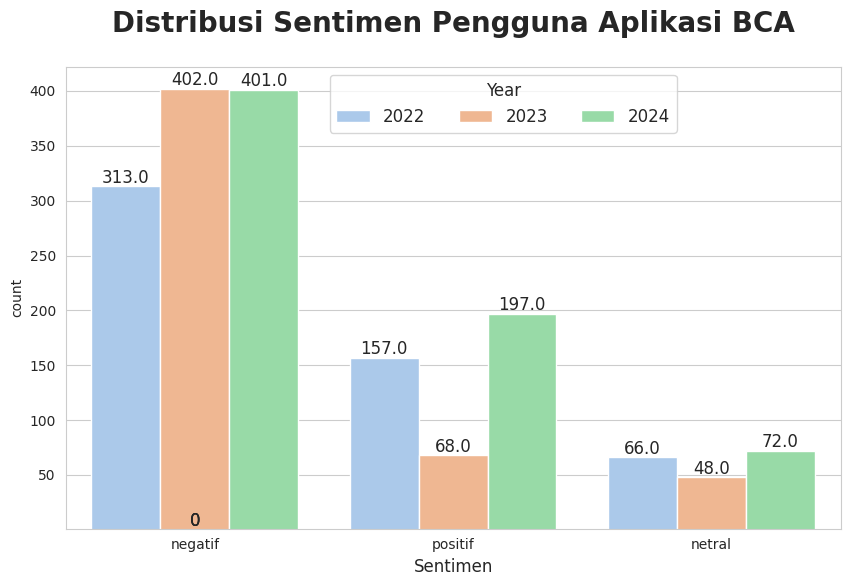

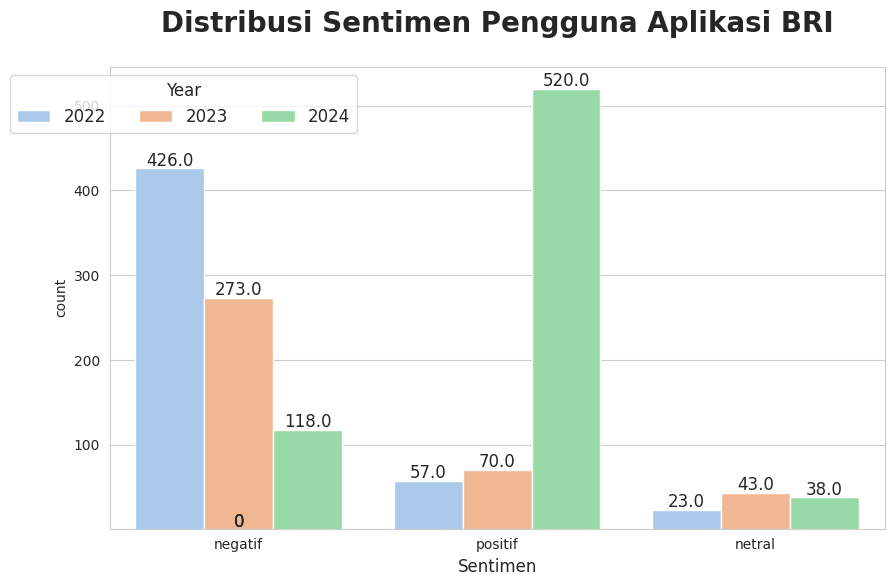

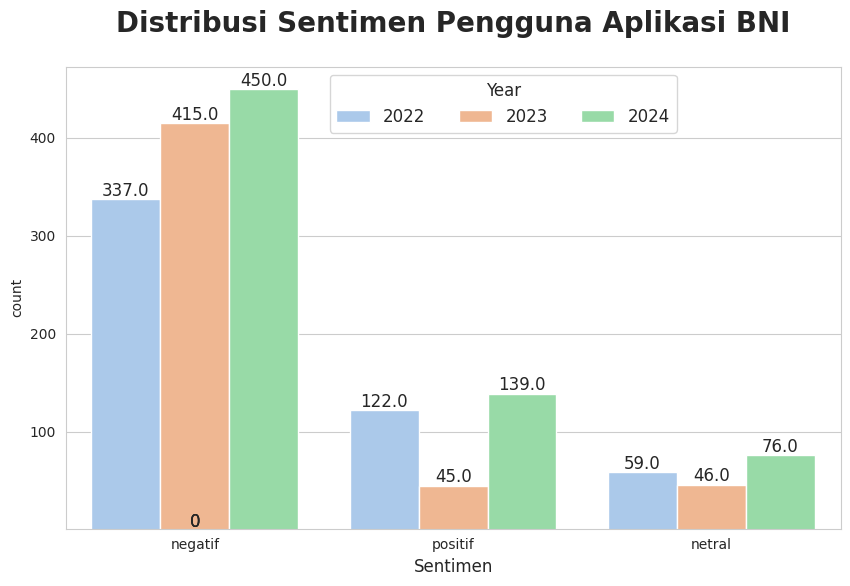

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan kolom datetime dan year sudah diproses
df['at'] = pd.to_datetime(df['at'])
df['year'] = df['at'].dt.year
applications = ['BCA', 'BRI', 'BNI']

for app in applications:
    df_app = df[df['application'] == app]
    position = range(len(df_app['sentimen'].unique()))
    labels = sorted(df_app['sentimen'].unique())

    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 6))

    # Generate plot
    ax = sns.countplot(x="sentimen", hue="year", data=df_app, palette="pastel")

    # Tambahkan label pada setiap bar
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2,
                rect.get_height() + 3.25, rect.get_height(),
                horizontalalignment='center', fontsize=12)

    # Tambahkan legend, title, dan label
    plt.legend(fontsize=12, bbox_to_anchor=(0.33, 1), ncol=3, title="Year", title_fontsize=12)
    plt.title(f"Distribusi Sentimen Pengguna Aplikasi {app}", fontsize=20, fontweight='bold', pad=25)
    plt.xlabel("Sentimen", fontsize=12)
    plt.ylim(1)
    plt.show()

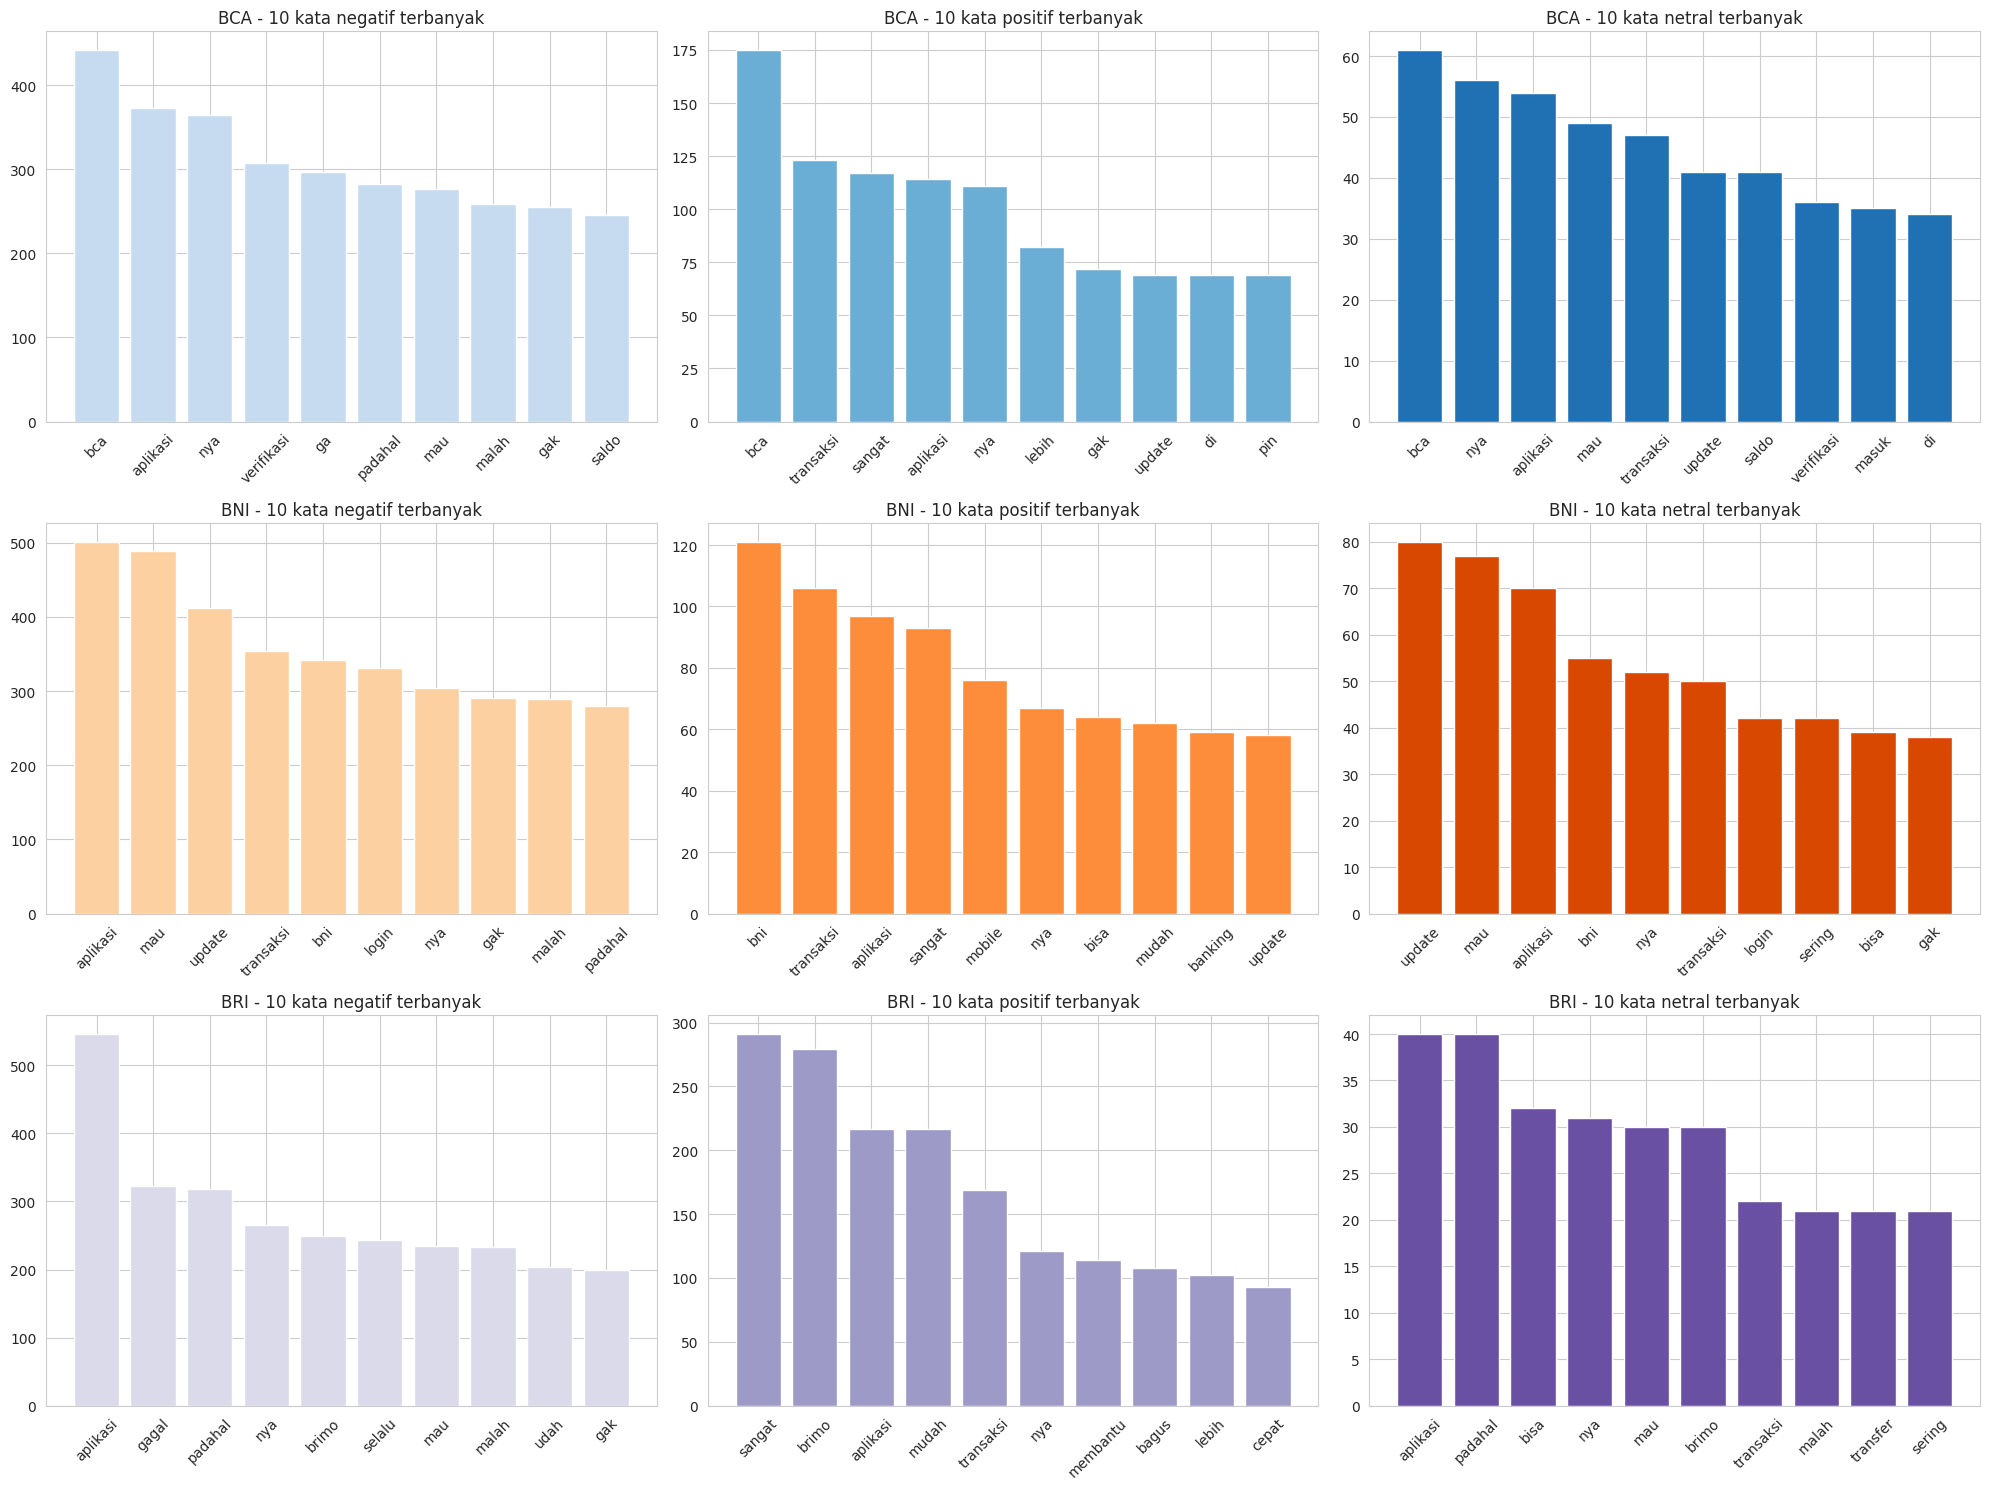

In [ ]:
def bersihkan_teks(teks):
    # Mengubah teks menjadi huruf kecil
    teks = teks.lower()

    # Menghapus angka dan simbol, hanya meninggalkan huruf
    teks = re.sub(r'[^a-z\s]', '', teks)

    # Menghapus spasi berlebih
    teks = re.sub(r'\s+', ' ', teks).strip()

    return teks

def hitung_kata_terbanyak(df, aplikasi, sentimen):
    # Ambil komentar berdasarkan aplikasi dan sentimen
    komentar = df[(df['application'] == aplikasi) & (df['sentimen'] == sentimen)]['content']

    # Pastikan semua elemen di 'komentar' adalah string
    komentar = komentar.astype(str)

    # Bersihkan teks
    komentar = komentar.apply(bersihkan_teks)

    # Hitung frekuensi kata
    kata_counter = Counter()
    komentar.apply(lambda x: kata_counter.update(x.split()))

    # Return DataFrame dengan 10 kata terbanyak
    return pd.DataFrame(kata_counter.most_common(10), columns=['Kata', 'Frekuensi'])

def visualiasi_kata(top_kata_df, judul, warna, posisi):
  plt.subplot(3, 3, posisi)
  plt.bar(top_kata_df['Kata'], top_kata_df['Frekuensi'], color=warna)
  plt.title(judul)
  plt.xticks(rotation=45)


aplikasi_list = ['BCA', 'BNI', 'BRI']
sentimen_list = ['negatif', 'positif', 'netral']

palette = {
    'BCA': sns.color_palette("Blues", 3),
    'BRI': sns.color_palette("Purples", 3),
    'BNI': sns.color_palette("Oranges", 3),
}

plt.figure(figsize=(20,15))

posisi = 1

for aplikasi in aplikasi_list:
    for idx, sentimen in enumerate(sentimen_list):
        top_kata_df = hitung_kata_terbanyak(df, aplikasi, sentimen)
        warna = palette[aplikasi][idx]
        judul = f'{aplikasi} - 10 kata {sentimen} terbanyak'
        visualiasi_kata(top_kata_df, judul, warna, posisi)
        posisi += 1

plt.tight_layout()
plt.show()



# 5. Prepare Data Training


In [ ]:
df_bca = df[df['application'] == 'BCA']
df_bri = df[df['application'] == 'BRI']
df_bni = df[df['application'] == 'BNI']

In [ ]:
x_bca = df_bca['content']
y_bca = df_bca['sentimen']

x_bri = df_bri['content']
y_bri = df_bri['sentimen']

x_bni = df_bni['content']
y_bni = df_bni['sentimen']


In [ ]:
data = {
    'BCA': (x_bca, y_bca),
    'BRI': (x_bri, y_bri),
    'BNI': (x_bni, y_bni)
}